In [1]:
import splat
import wisps.simulations as wispsim
from wisps.utils.tools import distance
from astropy.coordinates import SkyCoord

import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import wisps
import pandas as pd

import seaborn as sns

import matplotlib as mpl
from tqdm import tqdm

from astropy import stats as astrostats
import astropy

from astropy.time import Time
import numpy

import splat.simulate as spsim
import bisect

%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import random
import numba

In [2]:
from scipy import integrate

In [3]:
import itertools
from collections.abc import Iterable

In [4]:
def drop_nan(x):
    x=np.array(x)
    return x[(~np.isnan(x)) & (~np.isinf(x)) ]

def flatchain(x):
    return np.array(x.samples)

In [5]:
simvals=wispsim.simulate_spts()

In [6]:
simvals.keys()

dict_keys(['mass', 'ages', 'teffs', 'spts', 'norm', 'betas'])

In [7]:
masses=simvals['mass']
norm=simvals['norm']
ages=np.array(simvals['ages'])
teffs=np.array(simvals['teffs'])
spts=np.array(simvals['spts'])
betas=simvals['betas']

In [8]:
#other saved data
dlimits, spgrid, vols, vcs=wispsim.compute_effective_volumes()
directions=wispsim.OBSERVED_POINTINGS
dsamplers=wispsim.compute_effective_distances()
dsamplers=np.array(dsamplers)
distances= np.array([flatchain(x) for x in dsamplers])
diststs=np.concatenate(distances, axis=1)

In [9]:
len(drop_nan(masses))

100000

In [10]:
@numba.jit
def get_numbers(ages0, teffs0, spts0):
    
    #propagate spt unc, 
    spt_unc=np.nanmedian(spts0[:,1])
    spts1=np.random.normal(spts0[:,0], spt_unc)
    #remove nans from spts
    ignore_spt_index=np.isnan(spts1)
    ages1=ages0[~ignore_spt_index]
    teffs1=teffs0[~ignore_spt_index]
    spts1=spts1[~ignore_spt_index]
    f110, f140, f160, dists_for_spt, appf140, snrj, ph=wispsim.compute_effective_numbers(spts1, diststs, spgrid)
    return spts1, ages1, teffs1, f110, f140, f160, dists_for_spt, appf140, snrj, ph

In [11]:
f110s=[]
f140s=[]
f160s=[]
dists_for_spts=[]
appf140s=[]
snrjs=[]
phi=[]
ages1=[]
spts1=[]
for a, t, s in tqdm(zip(ages, teffs, spts)):
    spt, ag, teff, f110, f140, f160, dists_for_spt, appf140, snrj, ph=get_numbers(np.array(a), np.array(t), np.array(s))
    #print (f140)
    f110s.append(f110)
    f140s.append(f140)
    f160s.append(f160)
    dists_for_spts.append( np.array(dists_for_spt))
    appf140s.append(appf140)
    snrjs.append(np.array(snrj))
    phi.append(ph)
    ages1.append(ag)
    spts1.append(spt)
    

13it [53:06, 230.08s/it]


In [12]:
#fig, ax=plt.subplots(ncols=3, figsize=(12, 4), sharex=True)


#df.plot.hexbin(x='spt',
#                     y='logsnr',                  
#                     C='ps',                    
#                     reduce_C_function=np.mean,
#                     gridsize=15,
#                    cmap=wisps.MYCOLORMAP2, ax=ax[0])#

#df.plot.hexbin(x='spt',
#                     y='appF140',                  
#                     C='ps',                    
#                    reduce_C_function=np.mean,                   
#                    gridsize=15,
#                     cmap=wisps.MYCOLORMAP2, ax=ax[1])
#

#df.plot.hexbin(x='spt',
#                     y='logdist',                 
#                     C='ps',                    
#                     reduce_C_function=np.mean,                   
#                       gridsize=15,
#                     cmap=wisps.MYCOLORMAP2, ax=ax[2])

#ax[0].grid()
#ax[1].grid()
#ax[2].grid()
#
#ax[1].axhline(22.0, color='#111111', linestyle='--')
#ax[1].axhline(18.0, color='#111111', linestyle='--')#

#ax[2].plot(spgrid, np.log10(np.array(dlimits)[:,0]), color='#111111', linestyle='--')
#ax[2].plot(spgrid, np.log10(np.array(dlimits)[:,1]), color='#111111', linestyle='--')#

#ax[0].axhline(np.log10(3.0), color='#111111', linestyle='--')

#plt.tight_layout()

#ax[0].set_yticks(np.arange(-1, 3, 0.5), minor=True)
#ax[1].set_yticks(np.arange(16, 25, 0.5), minor=True)
#ax[2].set_yticks(np.arange(1, 4, 0.5), minor=True)

#for a in ax:
#    a.set_xlabel('SpT')
#    a.yaxis.set_ticks_position('both')
#    a.xaxis.set_ticks_position('both')
#    a.set_xticks(np.arange(19, 40, 1), minor=True)
#    a.tick_params(which='major',direction='inout')
#   a.tick_params(which='minor', direction='in')
#    a.set_xlim([20.0, 37.0])




#ax[0].set_ylabel('log SNR-J')
#ax[1].set_ylabel('app F140W')
#ax[2].set_ylabel('log d (pc)')
#plt.savefig(wisps.OUTPUT_FIGURES+'/selectionfx.pdf', bbox_inches = 'tight')

In [13]:
#

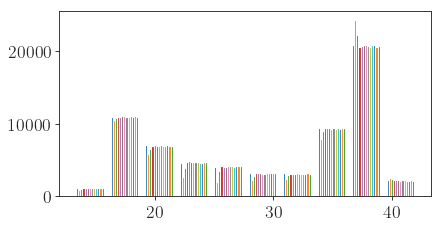

In [14]:
p=plt.hist(spts1)

In [15]:
len(phi[0])

18

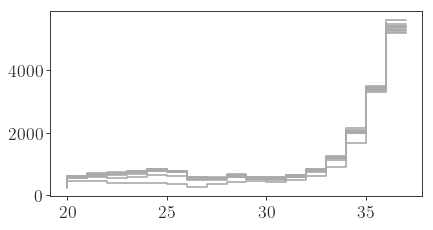

In [16]:
for i in range(0, len(phi)):
    plt.step(spgrid, phi[i], c='#AAAAAA')

#plt.xlabel('SpT')
#plt.ylabel(r'$ \mathcal{S}$ (SpT)')
#plt.savefig(wisps.OUTPUT_FIGURES+'/phi.pdf')


In [17]:
volumes=np.nansum(np.array(vols), axis=0)[:,0]

In [18]:
nexpct=np.array([(p*np.array(vols)[:,:,0]).T*norm for p in phi])

In [19]:
#

In [20]:
directs=wispsim.OBSERVED_POINTINGS

In [21]:
from astropy.coordinates import SkyCoord
coord=SkyCoord(directs)

In [22]:
import math

In [23]:
#np.log10(np.array(snrjs)[0])

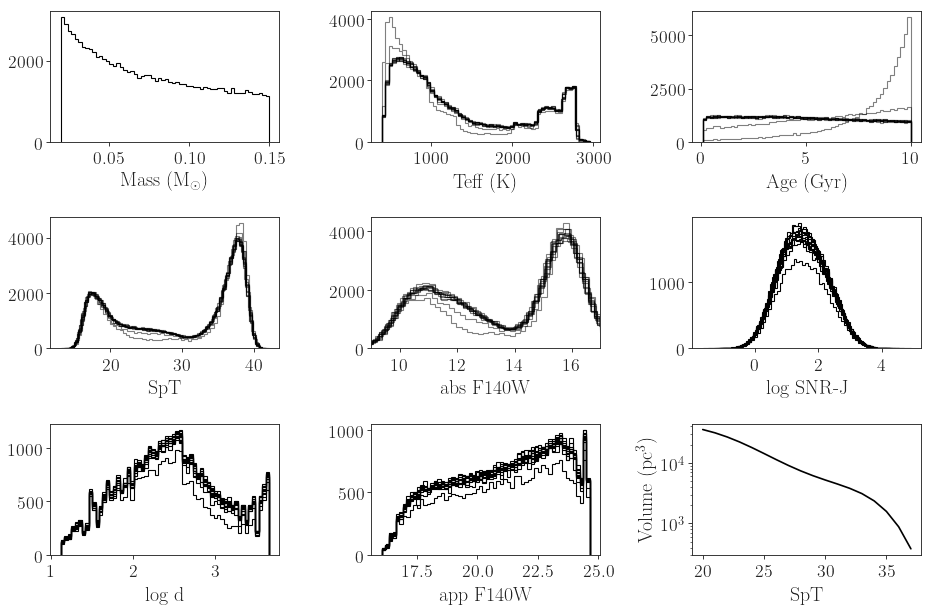

In [24]:
#visualization
fig, ax=plt.subplots(ncols=3, nrows=3, figsize=(12, 8))


ax[0][0].hist(drop_nan(masses), color="k", facecolor='#2ECC40', bins=60, histtype='step')

for idx in range(0, len(teffs)):
    ax[0][1].hist(drop_nan(teffs[idx]), color="k",  facecolor='#2ECC40', bins=60 , histtype='step', alpha=0.5)
    
    ax[0][2].hist(drop_nan(ages1[idx]),  color="k", facecolor='#2ECC40', bins=60, histtype='step', alpha=0.5)
    
    ax[1][0].hist(drop_nan(spts1[idx]),  color="k",facecolor='#2ECC40', bins=60, histtype='step', alpha=0.5)
    
    ax[1][1].hist(drop_nan(f140s[idx]),  color="k", facecolor='#2ECC40', bins=60, histtype='step', alpha=0.5)
    
    ax[1][2].hist(drop_nan(np.log10(np.array(snrjs)[idx])),  color="k",facecolor='#2ECC40', bins=60, histtype='step')
    
    ax[2][0].hist(drop_nan(np.log10(np.array(dists_for_spts[idx]))), color="k", facecolor='#2ECC40', bins=60, histtype='step')
    
    ax[2][1].hist(appf140s[idx], color="k", facecolor='#2ECC40', bins=60, histtype='step')


ax[2][2].semilogy(spgrid, volumes, color="k")


#ax[2][0].set_xlim([1.0, 3.5])
ax[1][1].set_xlim([9, 17])

#h=ax[2][2].hist2d(df2[:,0], df2[:,1],cmap='Blues', bins=50)

ax[0][0].set_xlabel(r'Mass (M$_\odot$)')
ax[0][1].set_xlabel(r'Teff (K)')
ax[0][2].set_xlabel(r'Age (Gyr)')

ax[1][0].set_xlabel(r'SpT')
ax[1][1].set_xlabel(r'abs F140W')
ax[1][2].set_xlabel(r'log SNR-J')

ax[2][0].set_xlabel('log d')
ax[2][1].set_xlabel('app F140W ')

ax[2][2].set_xlabel('SpT')
ax[2][2].set_ylabel(r'Volume (pc$^3$)')

plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+'/simulations_dists.pdf', bbox_inches = 'tight')


In [25]:
#slbin=[]
#wsleff=[] #number of spectra without selection effects
#for x in tqdm(spts):
#    index=np.where(np.logical_and(spts>=x,spts<x+1.))[0]
#    spectra_in_bin=len(spts[index])
#    slbin.append(spectra_in_bin*np.nanmean(mean_sl_fraction[index]))
#    wsleff.append(spectra_in_bin)

In [26]:
cands=wisps.datasets['candidates']
cands['spt']=cands.spt.apply(splat.typeToNum)
maskd=(cands[(cands.spt>=20)&(cands.spt<=38.0)]).spt
n=np.histogram(maskd.values, bins=18)[0]
n=n.astype(float)
#n[n==0]=np.nan

In [27]:
from astropy.stats import poisson_conf_interval
erro=poisson_conf_interval(n, interval='root-n').T
erro2=poisson_conf_interval(np.cumsum(np.flip(n)), interval='root-n').T

In [28]:
erro2=poisson_conf_interval(np.cumsum(np.flip(n))).T

In [29]:
erro3=np.concatenate(list(map(lambda x: x[1]-[0], erro2)))
erro4=np.concatenate(list(map(lambda x: x[1]-[0], erro)))

In [30]:
#bin in orders of 5 spts
def bin_by_spt_bin(sp_types, number):
    ranges=[[20, 25], [25, 30], [30, 35], [35, 40]]
    numbers=[]
    for r in ranges:
        idx= np.logical_and((r[0]<=sp_types), (r[1]>sp_types))
        numbers.append(np.nansum(number[idx]))
    return numbers

In [31]:
cmap = sns.cubehelix_palette(reverse=True, as_cmap=True)

In [32]:
colors=cmap(betas/10.0)

In [33]:
print (colors[2])

[0.18044469 0.12128609 0.24771876 1.        ]


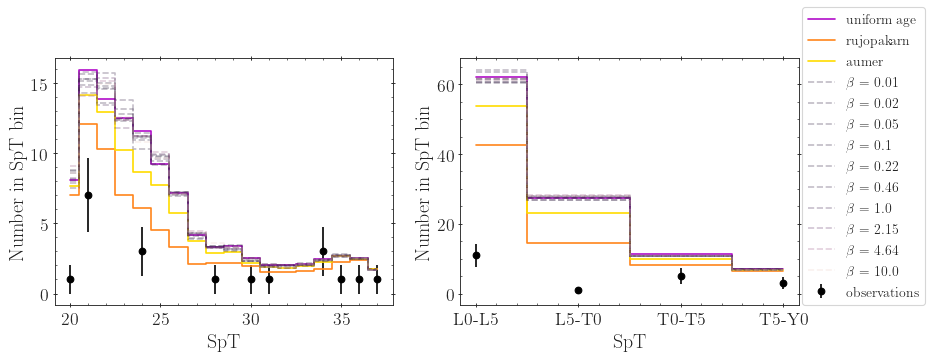

In [34]:
fig, ax=plt.subplots(ncols=2, figsize=(12, 4))
n[n==0.0]=np.nan

spgrid2=[ 'L0-L5', 'L5-T0', 'T0-T5', 'T5-Y0']
n2=bin_by_spt_bin(spgrid, n)
pred=np.array([bin_by_spt_bin(spgrid, p*volumes*norm) for p in phi])
#pred2=bin_by_spt_bin(spgrid, phi*volumes*norm)
#pred3=bin_by_spt_bin(spgrid, phi*volumes*norm)


ax[0].errorbar(spgrid,n, yerr=np.sqrt(n), label='observations',fmt='o', color='k')

ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[0].tick_params(which='major',direction='inout')
ax[0].tick_params(which='minor', direction='in')
ax[0].set_xticks(np.arange(15, 40, 1), minor=True)
ax[0].set_yticks(np.arange(0, 20, 1), minor=True)

ax[0].step(spgrid, phi[0]*volumes*norm,   color='#B10DC9',  where='mid', label='uniform age')
ax[0].step(spgrid, phi[1]*volumes*norm,   color='#FF851B',  where='mid',  label='rujopakarn')
ax[0].step(spgrid, phi[2]*volumes*norm,  color='#FFDC00',  where='mid',  label='aumer')
#ax[0].step(spgrid, phi*volumes*norm,  c='#0074D9',  where='mid',  label='Aumer')
#ax[0].step(spgrid, phi3*volumes*norm,  c='#2ECC40',  where='mid',  label='Miller')
ax[0].set_ylabel('Number in SpT bin')
ax[0].set_xlabel('SpT')

#ax[0].legend()


ax[1].errorbar(spgrid2,n2, yerr=np.sqrt(n2), label='observations',fmt='o', color='k')

ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')
ax[1].tick_params(which='major',direction='inout')
ax[1].tick_params(which='minor', direction='in')
#ax[1].set_xticks(np.arange(15, 40, 1), minor=True)
ax[1].set_yticks(np.arange(0, 50, 1), minor=True)

ax[1].step(spgrid2, pred[0],  color='#B10DC9',  where='mid', label='uniform age')
ax[1].step(spgrid2, pred[1], color='#FF851B',  where='mid',  label='rujopakarn')
ax[1].step(spgrid2, pred[2],color='#FFDC00',  where='mid',  label='aumer')

for bidx in range(0, len(betas)):

    ax[1].step(spgrid2, pred[bidx+3], 
               where='mid',  color=colors[bidx],alpha=0.3,
               label=r'$\beta$ = {}'.format(round(betas[bidx], 2)), linestyle='--')
    
    ax[0].step(spgrid, phi[bidx+3]*volumes*norm,   alpha=0.3,where='mid',  color=colors[bidx],
               label=r'$\beta$ = {}'.format(round(betas[bidx], 2)), linestyle='--')
    
#ax[1].step(spgrid2, pred2,  c='#0074D9',  where='mid',  label='Aumer')

ax[1].set_ylabel('Number in SpT bin')
ax[1].set_xlabel('SpT')
plt.minorticks_on()
ax[1].legend( fontsize = 'x-small', loc=(1.01, 0.))



#plt.savefig(wisps.OUTPUT_FIGURES+'/oberved_numbers.jpeg', bbox_inches='tight')